In [1]:
# Dependencies 
import pandas as pd
import requests
import string
import matplotlib.pyplot as plt

In [114]:
fatal_crash_file = 'csv_files/fatal_accidents_2019.csv'
crashes_df = pd.read_csv(fatal_crash_file, low_memory=False)
pd.set_option('display.max_columns', 94)
crashes_df = crashes_df.set_index('STATENAME', append=True)

In [115]:
crashes_df

,,Unnamed: 0,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,CITY,CITYNAME,COUNTY,COUNTYNAME,CaseYear,DAY,DAY_WEEK,DAY_WEEKNAME,DRUNK_DR,FATALS,FUNC_SYS,FUNC_SYSNAME,HARM_EV,HARM_EVNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,HOUR,HOURNAME,LATITUDE,LATITUDENAME,LGT_COND,LGT_CONDNAME,LONGITUD,LONGITUDNAME,MAN_COLL,MAN_COLLNAME,MILEPT,MILEPTNAME,MINUTE,MINUTENAME,MONTH,MonthName,NHS,NHSNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,PEDS,PERMVIT,PERNOTMVIT,PERSONS,PVH_INVL,RAIL,RAILNAME,RD_OWNER,RD_OWNERNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,REL_ROAD,REL_ROADNAME,ROAD_FNC,ROAD_FNCNAME,ROUTE,ROUTENAME,RUR_URB,RUR_URBNAME,SCH_BUS,SCH_BUSNAME,SP_JUR,SP_JURNAME,ST_CASE,State,TWAY_ID,TWAY_ID2,TYP_INT,TYP_INTNAME,VE_FORMS,VE_TOTAL,WEATHER,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHERNAME,WRK_ZONE,WRK_ZONENAME,YEAR
,STATENAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Alabama,0,13,1:00pm-1:59pm,9,9,0,None,0,None,0,None,2340,OPELIKA,81,LEE (81),2019,7,5,Thursday,1,1,1,Interstate,12,Motor Vehicle In-Transport,13,1:00pm-1:59pm,27,27,12,12:00pm-12:59pm,32.666222,32.666222,1,Daylight,-85.336658,-85.336658,1,Front-to-Rear,641,641,54,54,2,February,1,This section IS ON the NHS,12,12:00pm-12:59pm,59,59,0,3,0,3,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10001,1,I-85,NaN,1,Not an Intersection,2,2,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
1,Alabama,1,18,6:00pm-6:59pm,7,7,0,None,0,None,0,None,1280,GADSDEN,55,ETOWAH (55),2019,23,4,Wednesday,0,1,1,Interstate,12,Motor Vehicle In-Transport,99,Unknown,99,Unknown EMS Hospital Arrival Time,18,6:00pm-6:59pm,33.997828,33.997828,2,Dark - Not Lighted,-86.053997,-86.053997,1,Front-to-Rear,15,15,3,3,1,January,1,This section IS ON the NHS,18,6:00pm-6:59pm,3,3,0,2,0,2,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10002,1,I-759,NaN,1,Not an Intersection,2,2,2,2,Rain,0,No Additional Atmospheric Conditions,Rain,0,None,2019
2,Alabama,2,19,7:00pm-7:59pm,12,12,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,0,NOT APPLICABLE,29,CLEBURNE (29),2019,22,3,Tuesday,0,1,1,Interstate,12,Motor Vehicle In-Transport,20,8:00pm-8:59pm,5,5,19,7:00pm-7:59pm,33.660842,33.660842,2,Dark - Not Lighted,-85.391011,-85.391011,1,Front-to-Rear,2118,2118,0,0,1,January,1,This section IS ON the NHS,19,7:00pm-7:59pm,2,2,0,4,0,4,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,1,Interstate,1,Rural,0,No,0,No Special Jurisdiction,10003,1,I-20,NaN,1,Not an Intersection,3,3,10,10,Cloudy,0,No Additional Atmospheric Conditions,Cloudy,0,None,2019
3,Alabama,3,3,3:00am-3:59am,11,11,0,None,0,None,0,None,2562,RAINBOW CITY,55,ETOWAH (55),2019,22,3,Tuesday,0,1,1,Interstate,8,Pedestrian,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),3,3:00am-3:59am,33.956472,33.956472,2,Dark - Not Lighted,-86.140522,-86.140522,0,The First Harmful Event was Not a Collision wi...,1775,1775,15,15,1,January,1,This section IS ON the NHS,3,3:00am-3:59am,4,4,1,1,1,1,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,1,Interstate,1,Rural,0,No,0,No Special Jurisdiction,10004,1,I-59,NaN,1,Not an Intersection,1,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
4,Alabama,4,6,6:00am-6:59am,0,0,0,None,0,None,0,None,0,NOT APPLICABLE,3,BALDWIN (3),2019,18,6,Friday,1,1,1,Interstate,1,Rollover/Overturn,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),5,5:00am-5:59am,30.656269,30.656269,2,Dark - Not Lighted,-87.809461,-87.809461,0,The First Harmful Event was Not a Collision wi...,413,413,50,50,1,January,1,This section IS ON the NHS,99,Unknown,99,Unknown,0,1,0,1,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,4

In [118]:
county_info = 'csv_files/cleaned_county_vs_crash_count'
county_df = pd.read_csv(county_info, low_memory=False)
county_df = county_df.set_index('StateName', append=True)

In [119]:
county_df

,,Unnamed: 0,CountyName,CrashCount,Population
,StateName,,,,
0,South Carolina,0,ABBEVILLE COUNTY,1,24527.0
1,Virginia,1,ACCOMACK COUNTY,5,32316.0
2,Idaho,2,ADA COUNTY,21,481587.0
3,Oklahoma,3,ADAIR COUNTY,11,22194.0
4,Wisconsin,4,ADAMS COUNTY,106,20220.0
...,...,...,...,...,...
2640,Texas,2640,YOUNG COUNTY,3,18010.0
2641,California,2641,YUBA COUNTY,13,78668.0
2642,Colorado,2642,YUMA COUNTY,2,10019.0


In [123]:
state_clean = county_df.drop(['Unnamed: 0','CountyName','CrashCount'], axis=1)
state_clean

,,Population
,StateName,
0,South Carolina,24527.0
1,Virginia,32316.0
2,Idaho,481587.0
3,Oklahoma,22194.0
4,Wisconsin,20220.0
...,...,...
2640,Texas,18010.0
2641,California,78668.0
2642,Colorado,10019.0


In [128]:
state_clean.astype('int32').dtypes

Population    int32
dtype: object

In [147]:
state_pop_df = state_clean.groupby(['StateName']).sum()

In [150]:
state_pop_df

,Population
StateName,
Alabama,3995516.0
Arizona,7278717.0
Arkansas,2431961.0
California,39512223.0
Colorado,5134333.0
Connecticut,3565287.0
Delaware,973764.0
Florida,21364971.0
Georgia,10595273.0


In [ ]:
state_pop = count_df.groupby('STATENAME').count()

In [9]:
drunk_df = crashes_df[crashes_df['DRUNK_DR']==1]

In [10]:
drunk_df

,,Unnamed: 0,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,CITY,CITYNAME,COUNTY,COUNTYNAME,CaseYear,DAY,DAY_WEEK,DAY_WEEKNAME,DRUNK_DR,FATALS,FUNC_SYS,FUNC_SYSNAME,HARM_EV,HARM_EVNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,HOUR,HOURNAME,LATITUDE,LATITUDENAME,LGT_COND,LGT_CONDNAME,LONGITUD,LONGITUDNAME,MAN_COLL,MAN_COLLNAME,MILEPT,MILEPTNAME,MINUTE,MINUTENAME,MONTH,MonthName,NHS,NHSNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,PEDS,PERMVIT,PERNOTMVIT,PERSONS,PVH_INVL,RAIL,RAILNAME,RD_OWNER,RD_OWNERNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,REL_ROAD,REL_ROADNAME,ROAD_FNC,ROAD_FNCNAME,ROUTE,ROUTENAME,RUR_URB,RUR_URBNAME,SCH_BUS,SCH_BUSNAME,SP_JUR,SP_JURNAME,ST_CASE,State,TWAY_ID,TWAY_ID2,TYP_INT,TYP_INTNAME,VE_FORMS,VE_TOTAL,WEATHER,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHERNAME,WRK_ZONE,WRK_ZONENAME,YEAR
,STATENAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Alabama,0,13,1:00pm-1:59pm,9,9,0,None,0,None,0,None,2340,OPELIKA,81,LEE (81),2019,7,5,Thursday,1,1,1,Interstate,12,Motor Vehicle In-Transport,13,1:00pm-1:59pm,27,27,12,12:00pm-12:59pm,32.666222,32.666222,1,Daylight,-85.336658,-85.336658,1,Front-to-Rear,641,641,54,54,2,February,1,This section IS ON the NHS,12,12:00pm-12:59pm,59,59,0,3,0,3,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10001,1,I-85,NaN,1,Not an Intersection,2,2,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
4,Alabama,4,6,6:00am-6:59am,0,0,0,None,0,None,0,None,0,NOT APPLICABLE,3,BALDWIN (3),2019,18,6,Friday,1,1,1,Interstate,1,Rollover/Overturn,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),5,5:00am-5:59am,30.656269,30.656269,2,Dark - Not Lighted,-87.809461,-87.809461,0,The First Harmful Event was Not a Collision wi...,413,413,50,50,1,January,1,This section IS ON the NHS,99,Unknown,99,Unknown,0,1,0,1,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,4,On Roadside,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10005,1,I-10,NaN,1,Not an Intersection,1,1,5,5,"Fog, Smog, Smoke",0,No Additional Atmospheric Conditions,"Fog, Smog, Smoke",0,None,2019
7,Alabama,7,88,Not Applicable,88,Not Applicable,0,None,0,None,0,None,790,COTTONWOOD,69,HOUSTON (69),2019,9,7,Saturday,1,1,7,Local,1,Rollover/Overturn,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),21,9:00pm-9:59pm,31.068686,31.068686,2,Dark - Not Lighted,-85.333658,-85.333658,0,The First Harmful Event was Not a Collision wi...,0,None,2,2,2,February,0,This section IS NOT on the NHS,88,Not Applicable (Not Notified),88,Not Applicable (Not Notified),0,1,0,1,0,0000000,Not Applicable,2,County Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,4,County Road,1,Rural,0,No,0,No Special Jurisdiction,10008,1,CR-FLETCHER SMITH RD,NaN,1,Not an Intersection,1,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
10,Alabama,10,2,2:00am-2:59am,23,23,0,None,0,None,0,None,0,NOT APPLICABLE,123,TALLAPOOSA (123),2019,1,3,Tuesday,1,1,4,Minor Arterial,42,Tree (Standing Only),99,Unknown,99,Unknown EMS Hospital Arrival Time,1,1:00am-1:59am,33.104300,33.104300,2,Dark - Not Lighted,-85.773344,-85.773344,0,The First Harmful Event was Not a Collision wi...,528,528,45,45,1,January,0,This section IS NOT on the NHS,99,Unknown,99,Unknown,0,3,0,3,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,4,On Roadside,NaN,NaN,3,State Highway,1,Rural,0,No,0,No Special Jurisdiction,10011,1,SR-49,NaN,1,Not an Intersection,1,1,2,2,Rain,0,No Additional Atmospheric Conditions,Rain,0,None,2019
27,Alabama,27,16,4:00pm-4:59pm,18,18,0,None,0,None,0,None,3050,TUSCALOOSA,125,TUSCALOOSA (125),2019,12,7,Saturday,1,2,3,Principal Arterial - Other,12,Motor Vehicle In-Transport,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),16,4:00pm-4:59pm,33.170528,33.170528,1,Daylight,-87.486125,-87.4

In [14]:
state_count = drunk_df.groupby('STATENAME').count()

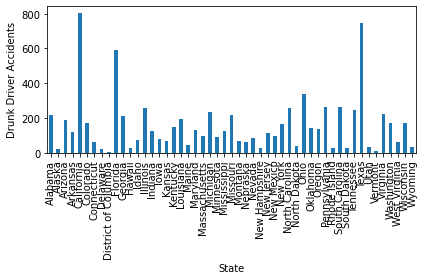

In [18]:
state_countplt = state_count['CITY']
state_countplt.plot(kind='bar')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Drunk Driver Accidents')
plt.tight_layout()
plt.show()

In [175]:
rur_urb = crashes_df.groupby(['STATENAME', 'RUR_URBNAME']).count().unstack('RUR_URBNAME')
rurb_count = rur_urb['Unnamed: 0']

In [176]:
rurb_clean = rurb_count.drop(['Not Reported','Trafficway Not in State Inventory','Unknown'], axis=1)
rurb_clean

RUR_URBNAME,Rural,Urban
STATENAME,,
Alabama,484.0,372.0
Alaska,33.0,28.0
Arizona,299.0,557.0
Arkansas,314.0,153.0
California,1001.0,2310.0
Colorado,220.0,321.0
Connecticut,46.0,184.0
Delaware,68.0,54.0
District of Columbia,NaN,22.0


In [177]:
merge_state = pd.concat([rurb_clean, state_pop_df], axis=1)

In [178]:
merge_state_df = pd.DataFrame(merge_state)
merge_state_df

,Rural,Urban,Population
Alabama,484.0,372.0,3995516.0
Alaska,33.0,28.0,NaN
Arizona,299.0,557.0,7278717.0
Arkansas,314.0,153.0,2431961.0
California,1001.0,2310.0,39512223.0
Colorado,220.0,321.0,5134333.0
Connecticut,46.0,184.0,3565287.0
Delaware,68.0,54.0,973764.0
District of Columbia,NaN,22.0,NaN
Florida,743.0,2205.0,21364971.0


In [179]:
merge_state_df['Rural2']= ((merge_state_df['Rural']/merge_state_df['Population'])*100000)
merge_state_df['Urban2']= ((merge_state_df['Urban']/merge_state_df['Population'])*100000)


In [215]:
merge_state_sort = merge_state_df.sort_values(by='Population', ascending=False)
merge_state_sort

,Rural,Urban,Population,Rural2,Urban2
California,1001.0,2310.0,39512223.0,2.533393,5.846292
Texas,1268.0,2019.0,28852972.0,4.394695,6.997546
Florida,743.0,2205.0,21364971.0,3.477655,10.320632
New York,300.0,568.0,18990274.0,1.579756,2.991005
Pennsylvania,469.0,515.0,12656681.0,3.705553,4.068997
Illinois,319.0,609.0,11959844.0,2.667259,5.092040
Ohio,467.0,561.0,11389839.0,4.100146,4.925443
Georgia,463.0,911.0,10595273.0,4.369873,8.598174
North Carolina,679.0,595.0,10242385.0,6.629315,5.809194
Michigan,362.0,535.0,9912321.0,3.652021,5.397323


In [226]:
merge_state_sort = merge_state_sort.dropna(how='all')
merge_state_sort

,Rural,Urban,Population,Rural2,Urban2
California,1001.0,2310.0,39512223.0,2.533393,5.846292
Texas,1268.0,2019.0,28852972.0,4.394695,6.997546
Florida,743.0,2205.0,21364971.0,3.477655,10.320632
New York,300.0,568.0,18990274.0,1.579756,2.991005
Pennsylvania,469.0,515.0,12656681.0,3.705553,4.068997
Illinois,319.0,609.0,11959844.0,2.667259,5.092040
Ohio,467.0,561.0,11389839.0,4.100146,4.925443
Georgia,463.0,911.0,10595273.0,4.369873,8.598174
North Carolina,679.0,595.0,10242385.0,6.629315,5.809194
Michigan,362.0,535.0,9912321.0,3.652021,5.397323


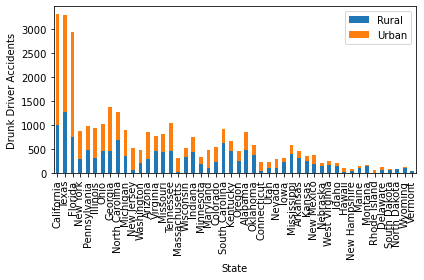

In [227]:
merge_state_sort[['Rural', 'Urban']].plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Drunk Driver Accidents')
plt.tight_layout()
plt.show()

In [228]:
large_pop = merge_state_sort.nlargest(5,'Population')
large_pop

,Rural,Urban,Population,Rural2,Urban2
California,1001.0,2310.0,39512223.0,2.533393,5.846292
Texas,1268.0,2019.0,28852972.0,4.394695,6.997546
Florida,743.0,2205.0,21364971.0,3.477655,10.320632
New York,300.0,568.0,18990274.0,1.579756,2.991005
Pennsylvania,469.0,515.0,12656681.0,3.705553,4.068997


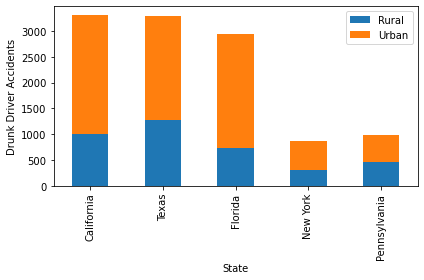

In [229]:
large_pop[['Rural', 'Urban']].plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Drunk Driver Accidents')
plt.tight_layout()
plt.show()

In [230]:
small_pop = merge_state_sort.nsmallest(5,'Population')
small_pop

,Rural,Urban,Population,Rural2,Urban2
Vermont,40.0,4.0,558345.0,7.164029,0.716403
Wyoming,100.0,19.0,566969.0,17.637649,3.351153
North Dakota,72.0,16.0,699711.0,10.289963,2.286658
South Dakota,71.0,17.0,731608.0,9.704651,2.323649
Delaware,68.0,54.0,973764.0,6.983212,5.545492


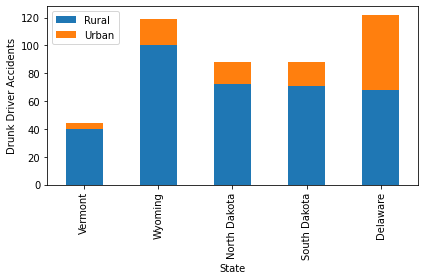

In [231]:
small_pop[['Rural', 'Urban']].plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Drunk Driver Accidents')
plt.tight_layout()
plt.show()

In [201]:
merge_state_sort.dtypes

Rural         float64
Urban         float64
Population    float64
Rural2        float64
Urban2        float64
dtype: object

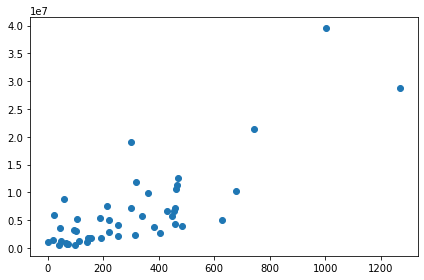

In [235]:
plt.scatter(merge_state_sort.Rural,merge_state_sort.Population)
plt.tight_layout()
plt.show()

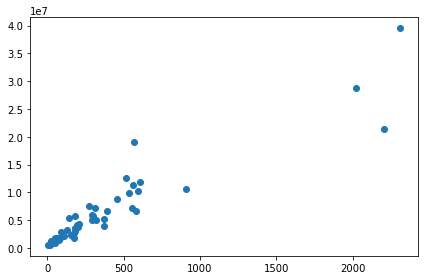

In [236]:
plt.scatter(merge_state_sort.Urban,merge_state_sort.Population)
plt.tight_layout()
plt.show()

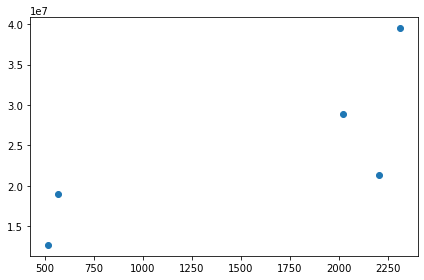

In [237]:
plt.scatter(large_pop.Urban,large_pop.Population)
plt.tight_layout()
plt.show()

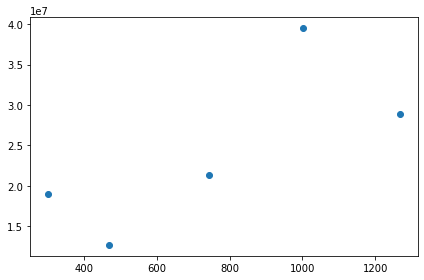

In [239]:
plt.scatter(large_pop.Rural,large_pop.Population)
plt.tight_layout()
plt.show()

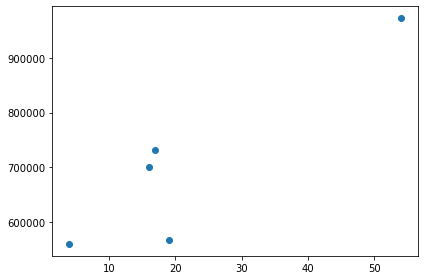

In [238]:
plt.scatter(small_pop.Urban,small_pop.Population)
plt.tight_layout()
plt.show()

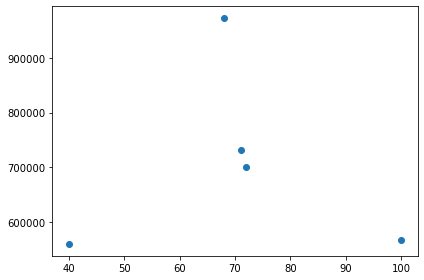

In [240]:
plt.scatter(small_pop.Rural,small_pop.Population)
plt.tight_layout()
plt.show()